# Quick Intro to Matplotlib

Tamás Gál (tamas.gal@fau.de)

The latest version of this notebook is available at [https://github.com/Asterics2020-Obelics](https://github.com/Asterics2020-Obelics/School2017/tree/master/pandas)

In [17]:
%matplotlib inline
import matplotlib as ml
import sys
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

print("Python version: {0}\n"
      "Matplotlib version: {1}"
      .format(sys.version, ml.__version__))

Python version: 3.6.5 (default, Jun  1 2018, 14:48:24) 
[GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]
Matplotlib version: 2.2.2


In [18]:
from IPython.core.magic import register_line_magic

@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

In [19]:
import warnings
warnings.filterwarnings('ignore')  # annoying UserWarnings from Jupyter/seaborn which are not fixed yet

## Exercise 1

Create a simple plot with $x = [1, 2, 3]$ and $y = [5, 3, 7]$ using `plt.plot()`

### Solution

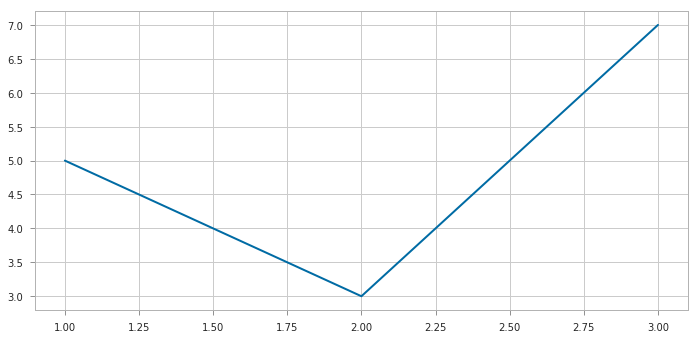

In [20]:
plt.plot([1, 2, 3], [5, 3, 7]);

## Exercise 2

Plot $f(x) = x^2$ for $x\in[-10, 10]$

### Solution

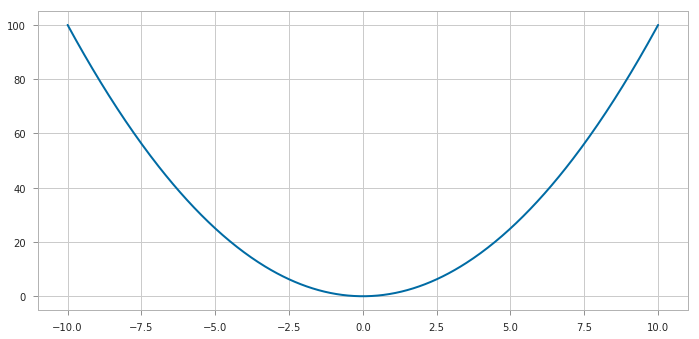

In [21]:
x = np.linspace(-10, 10, 500)

plt.plot(x, x**2)

## Exercise 3

Plot $f(x) = sin(x)$ and $g(x) = cos(x)$ for $x\in[-10, 10]$ in the same plot (overlay).

### Solution

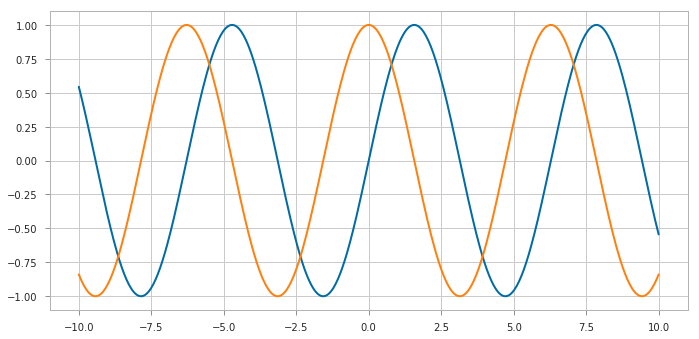

In [22]:
x = np.linspace(-10, 10, 500)   # 50 points between 0 and 2π

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

### Alternative Solution

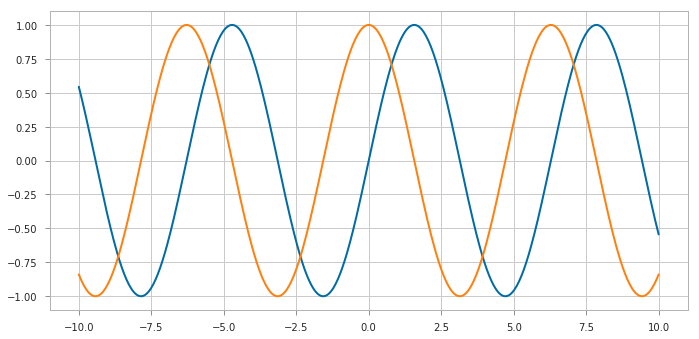

In [23]:
x = np.linspace(-10, 10, 500)   # 50 points between 0 and 2π

fig, ax = plt.subplots()

ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x));

## Exercise 4

Change the discrete line of `f(x) = sin(x)` to a dashed line and add a legend with `f(x)` and `g(x)` and label the x and y axes. 

### Solution

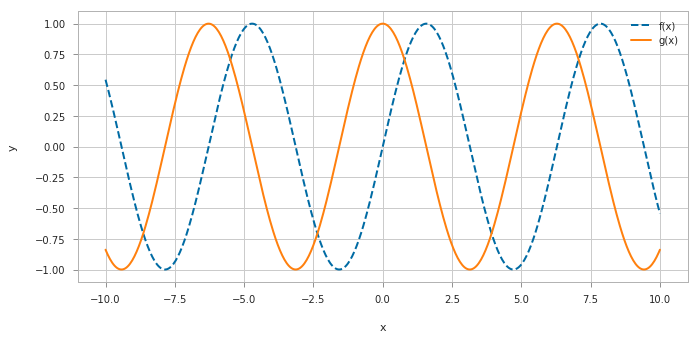

In [24]:
x = np.linspace(-10, 10, 500)   # 50 points between 0 and 2π

fig, ax = plt.subplots()

ax.plot(x, np.sin(x), '--', label='f(x)')
ax.plot(x, np.cos(x), label='g(x)')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.legend();

## Exercise 5

Plot $f(x) = sin(x)$ and $g(x) = cos(x)$ for $x\in[-10, 10]$ side-by-side!  (hint: `plt.subplots`)


### Solution

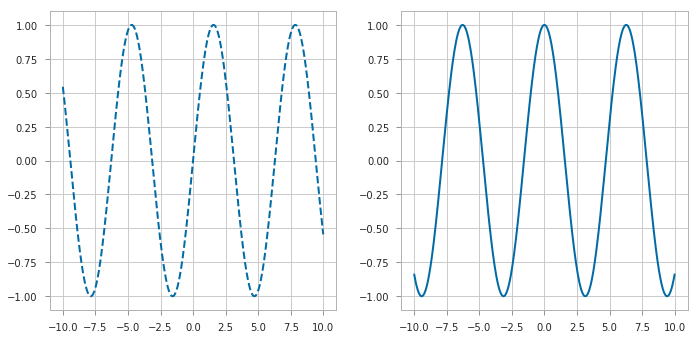

In [25]:
x = np.linspace(-10, 10, 500)   # 50 points between 0 and 2π

fig, axes = plt.subplots(ncols=2, nrows=1)

axes[0].plot(x, np.sin(x), '--')
axes[1].plot(x, np.cos(x))

## Exercise 6

Plot the functions $f_i(x) = x^{i + 1}$ for $i \in [0, 10]$ in different colours. Show the function definition in the y-label!

### Solution

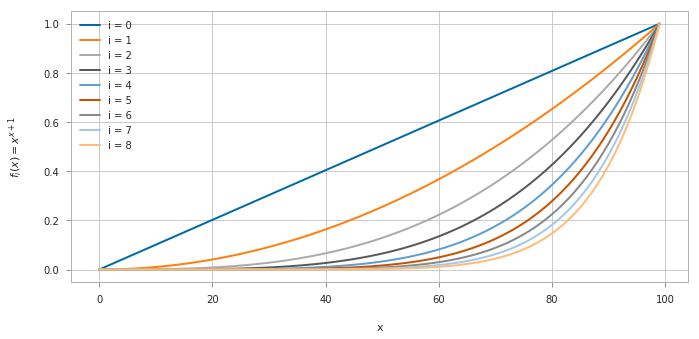

In [26]:
x = np.linspace(0, 1, 100)

for n in range(9):
    plt.plot(x**(n + 1), color='C{}'.format(n), label=r"i = {}".format(n))
plt.xlabel('x')
plt.ylabel(r"$f_i(x) = x^{x+1}$")
plt.legend()

## Exercise 7

Plot the function $f(x) = e^x$ for $i \in [0, 10]$ with a logarithmic y-scale.

### Solution

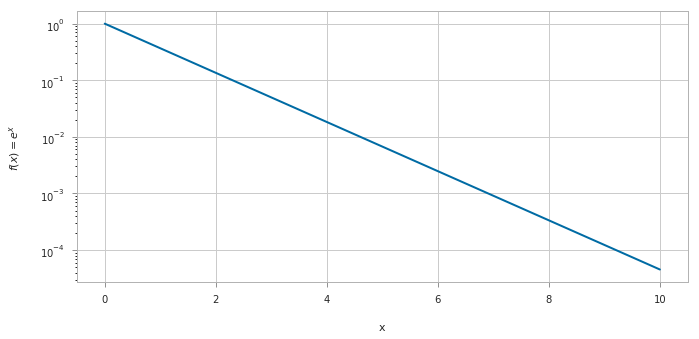

In [27]:
x = np.linspace(0, 10)
# x = np.logspace(-1, 2, 100)

plt.plot(x, np.exp(-x))
plt.yscale('log')
plt.xlabel('x')
plt.ylabel(r"$f(x) = e^x$");

## Exercise 8

Create a scatterplot from some random data (try `np.random.multivariate_normal`)!

### Solution

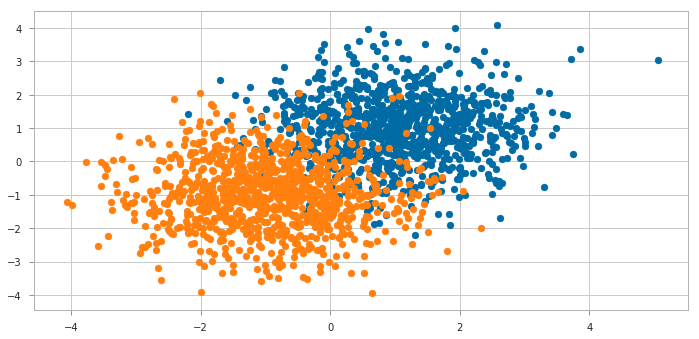

In [28]:
x1, y1 = np.random.multivariate_normal([1, 1], [[1, 0], [0, 1]], 1000).T
x2, y2 = np.random.multivariate_normal([-1, -1], [[1, 0], [0, 1]], 1000).T

plt.scatter(x1, y1)
plt.scatter(x2, y2);

## Exercise 9

Create a histogram of a normal distribution.

### Solution

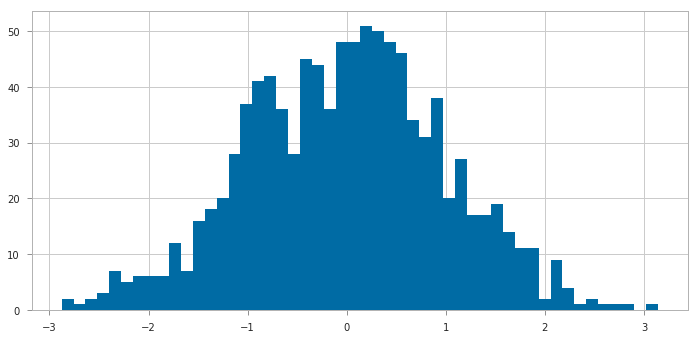

In [29]:
x = np.random.normal(0, 1, 1000)
plt.hist(x, bins=50);

## Finally create a PDF, EPS, PNG and JPG from $f(x) = sin(x^3)$:

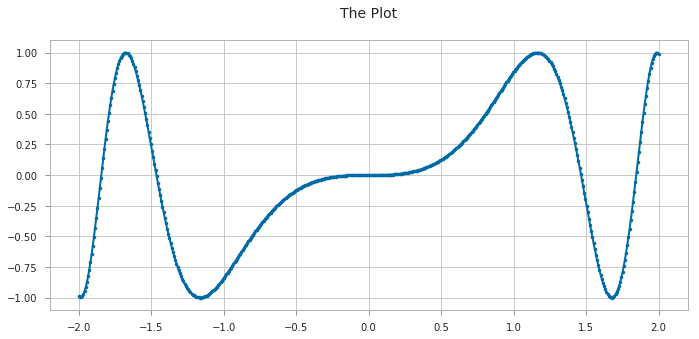

In [30]:
x = np.linspace(-2, 2, 500)
plt.plot(x, np.sin(x**3), marker='.')
plt.title("The Plot")

# vector graphics for print
plt.savefig('the_plot.pdf')
plt.savefig('the_plot.eps')

# pixel graphics for screen
plt.savefig('the_plot.png', dpi=300)
plt.savefig('the_plot.jpg', dpi=300)

## Colormap pitfalls

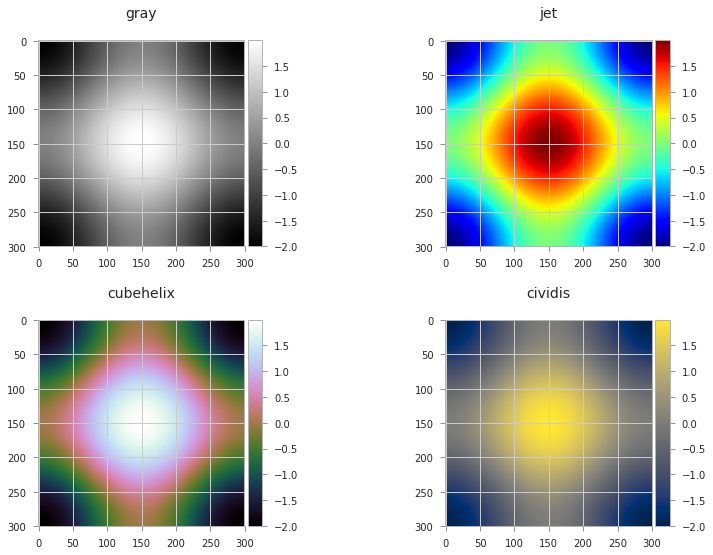

In [31]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

x = np.linspace(-np.pi, np.pi, 300)
xx, yy = np.meshgrid(x, x)
z = np.cos(xx) + np.cos(yy)

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

for ax, colourmap in zip(axes.flatten(), ['gray', 'jet', 'cubehelix', 'cividis']):
    ax.set_title(colourmap)
    im = ax.imshow(z, cmap=plt.get_cmap(colourmap))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='7%', pad=0.05)
    cbar = plt.colorbar(im, cax=cax)

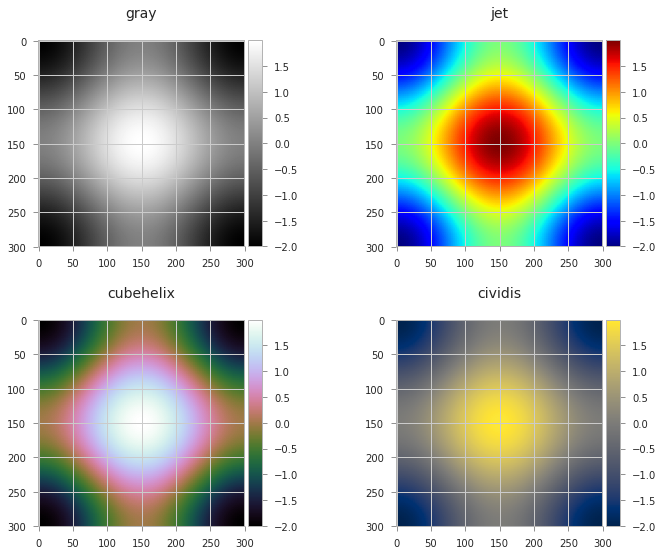

In [32]:
fig

## Acknowledgements
![](images/eu_asterics.png)

This tutorial was supported by the H2020-Astronomy ESFRI and Research Infrastructure Cluster (Grant Agreement number: 653477).